# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?


In [1]:
import pandas as pd # imported pandas as pd


In [2]:
ab_nyc_2019 = pd.read_csv(r'C:\Users\jjs61\OneDrive\Desktop\Data Analytics\Coding_Temple\week_3\Data\AB_NYC_2019.csv')  # Read in CSV file


In [3]:

display(ab_nyc_2019.describe()) # looked at the high- level data summary

print(f'There are {len(ab_nyc_2019)} rows of data in our dataframe.')


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


There are 48895 rows of data in our dataframe.


<Axes: xlabel='neighbourhood_group', ylabel='price'>

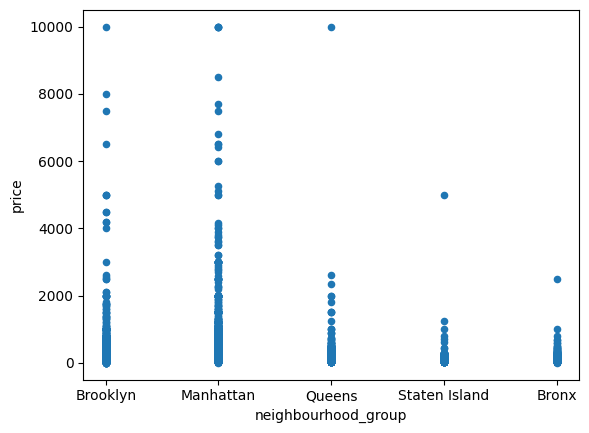

In [4]:
ab_nyc_2019.plot.scatter(x="neighbourhood_group", y="price")

In [5]:
# Accounts with no reviews should be considered inactive or new/never used
# Verified     
# We will remove from the dataframe
#
num_of_rev = ab_nyc_2019[ab_nyc_2019['number_of_reviews'] < 1]
num_of_rev.describe()



,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.005200e+04,1.005200e+04,10052.000000,10052.000000,10052.000000,10052.000000,10052.0,0.0,10052.000000,10052.000000
mean,2.257484e+07,8.068437e+07,40.732099,-73.956117,192.919021,11.519797,0.0,NaN,14.793275,104.660466
std,1.135563e+07,8.712593e+07,0.052598,0.043796,358.653017,29.207928,0.0,NaN,50.363637,139.072127
min,3.647000e+03,4.632000e+03,40.499790,-74.242850,0.000000,1.000000,0.0,NaN,1.000000,0.000000
25%,1.208404e+07,1.207519e+07,40.697570,-73.984758,70.000000,1.000000,0.0,NaN,1.000000,0.000000
50%,2.337757e+07,3.979538e+07,40.728870,-73.960175,120.000000,3.000000,0.0,NaN,1.000000,6.000000
75%,3.402092e+07,1.330001e+08,40.763643,-73.939877,200.000000,14.000000,0.0,NaN,2.000000,214.250000
max,3.648724e+07,2.743213e+08,40.911690,-73.716900,10000.000000,1000.000000,0.0,NaN,327.000000,365.000000


In [6]:
# removed the NaN data from the dataframe

ab_nyc_2019.dropna(subset =['last_review'],inplace=True)  


ab_nyc_2019.isna().sum() # Verified NaN values were removed inorder to clean data





id                                 0
name                               6
host_id                            0
host_name                         16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

<Axes: title={'center': 'Busiest Hosts:\nZero Availability & Most Reviews'}, xlabel='host_id,host_name', ylabel='Reviews'>

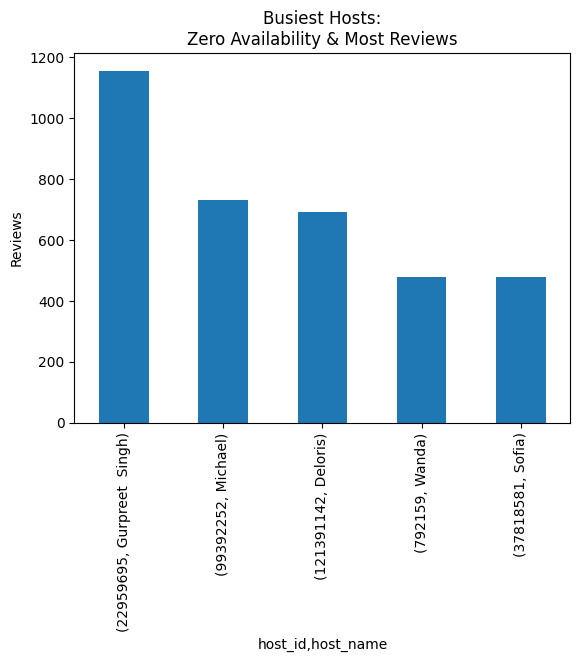

In [7]:
# Which hosts are the busiest and why?
# Answer: Host id is unique. (grouped by the same, and added host name)
# summed all reviews    --> Host ID 
# Mr Singh is the busiest host

busiest_host0 = ab_nyc_2019[ab_nyc_2019['availability_365'] < 1]
busiest_host0_plot = busiest_host0.groupby(['host_id','host_name']).sum('number_of_reviews').sort_values('number_of_reviews',ascending=False).head(5)[['number_of_reviews']]
busiest_host0_plot.plot(y='number_of_reviews', kind='bar',ylabel='Reviews',legend=False,title='Busiest Hosts:\nZero Availability & Most Reviews')















<Axes: title={'center': 'Neighbourhood Group by Reviews:'}, xlabel='Neighbourhood Group', ylabel='Reviews'>

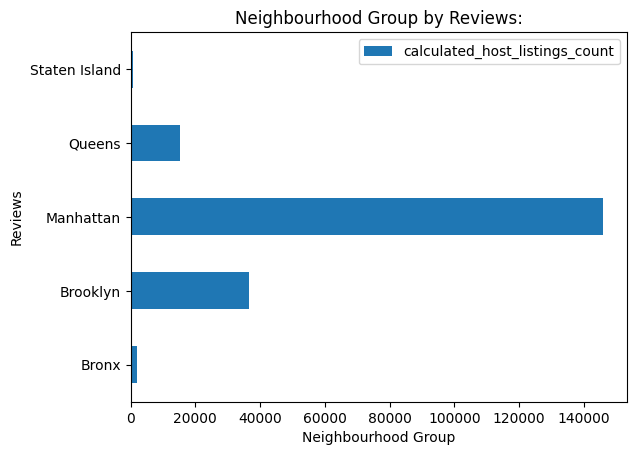

In [21]:
# How many neighborhood groups are available and which shows up the most?
# There are five neighborhood groups and Manhattan shows up the most.

ab_nyc_2019.groupby("neighbourhood_group", as_index=False).sum()[['neighbourhood_group', 'calculated_host_listings_count']]
ab_nyc_2019.groupby("neighbourhood_group", as_index=False).sum()[['neighbourhood_group', 'calculated_host_listings_count']].plot(
    x='neighbourhood_group', y="calculated_host_listings_count",ylabel='Reviews',xlabel="Neighbourhood Group",kind='barh',title="Neighbourhood Group by Reviews:")


id
neighbourhood_group room_type            
Manhattan           Entire home/apt  9967
                    Private room     6309
                    Shared room       356

<Axes: title={'center': 'Manhattan Room Type by Listing:'}, ylabel='Listings'>

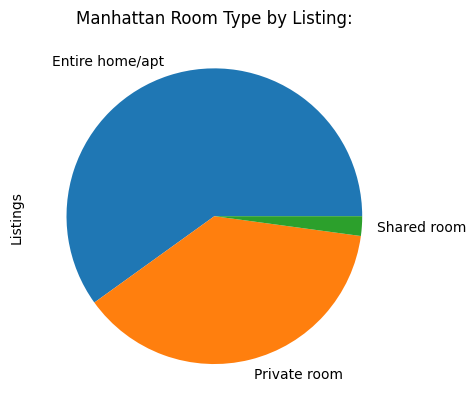

In [9]:
# Are private rooms the most popular in manhattan?
# dataframe is only zero availability
manhattan = ab_nyc_2019[ab_nyc_2019['neighbourhood_group'] == 'Manhattan']
display(manhattan.groupby(["neighbourhood_group", 'room_type'], ).count()[['id']])
manhattan.groupby(['room_type'] ).count()[['id']].plot(x='room_type', y='id',kind='pie',legend=False,title='Manhattan Room Type by Listing:',ylabel="Listings")



,number_of_reviews
sum,21858.000000
mean,218.580000
std,138.985224
median,179.000000


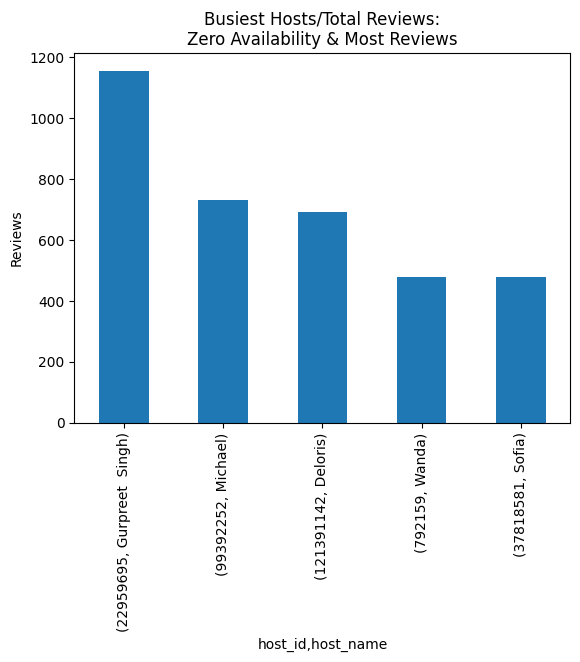

In [10]:
# Which hosts are the busiest and why?
# dataframe == no availability
# When looking at the Mean and Median for the top 100 hosts with the most reivews, The top 5 hosts in reviews all have double the mean and median of reviews 


busiest_host0_plot = busiest_host0.groupby(['host_id','host_name']).sum('number_of_reviews').sort_values('number_of_reviews',ascending=False).head(5)[['number_of_reviews',]]
busiest_host0_plot.plot(y='number_of_reviews', kind='bar',ylabel='Reviews',legend=False,title='Busiest Hosts/Total Reviews:\nZero Availability & Most Reviews',stacked=True)

busiest_host0.groupby(['host_id','host_name']).sum('number_of_reviews').sort_values('number_of_reviews',ascending=False).head(100)[['number_of_reviews',]].agg(['sum', 'mean', 'std','median'])

<Axes: title={'center': 'Average Price by Neighbourhood Group:'}, xlabel='Neighbourhood Group', ylabel='Average Price'>

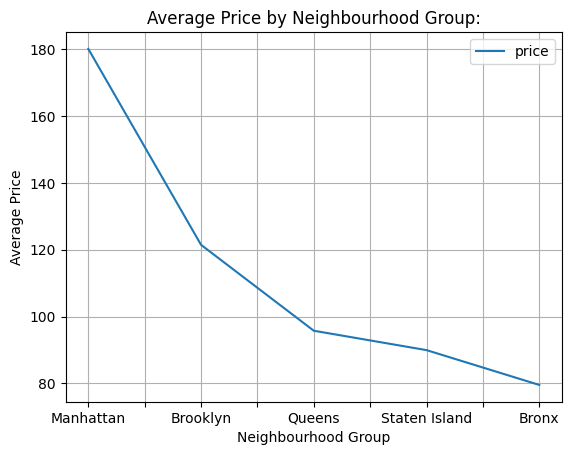

In [11]:
# Which neighorhood group has the highest average price?
# Manhattan has the highest average price at $180.05 a nite.

group_plot = ab_nyc_2019.groupby('neighbourhood_group', as_index=False).mean('price').sort_values('price', ascending=False).round(2)[['neighbourhood_group', 'price']]
group_plot.plot(grid=True,x='neighbourhood_group', y='price',ylabel='Average Price',xlabel='Neighbourhood Group', title="Average Price by Neighbourhood Group:")


In [12]:
# Which neighbor hood group has the highest total price?
#  Manhattan has the highest total prices

average_total_price = ab_nyc_2019.groupby('neighbourhood_group', as_index=False).mean('price').sort_values('price', ascending=False).round(0)[['neighbourhood_group', 'price']]
print(f"The average prices by neighbourhood group are below:\n{average_total_price}\n")
# Brooklyn and Queens had the highest individual price at $10,000 a night.

median_total_price = ab_nyc_2019.groupby('neighbourhood_group', as_index=False).median('price').sort_values('price', ascending=False).round(0)[['neighbourhood_group', 'price']]
print(f"The median prices by neighbourhood group are below:\n{median_total_price}\n")
# Brooklyn and Queens had the highest individual price at $10,000 a night.

highest_individual_price = ab_nyc_2019.groupby('neighbourhood_group', as_index=False).max('price').sort_values('price', ascending=False).round(0)[['neighbourhood_group', 'price']]
print(f"The highest price by neighbourhood group are below:\n{highest_individual_price}")


The average prices by neighbourhood group are below:
  neighbourhood_group  price
2           Manhattan  180.0
1            Brooklyn  121.0
3              Queens   96.0
4       Staten Island   90.0
0               Bronx   80.0

The median prices by neighbourhood group are below:
  neighbourhood_group  price
2           Manhattan  140.0
1            Brooklyn   94.0
4       Staten Island   75.0
3              Queens   72.0
0               Bronx   65.0

The highest price by neighbourhood group are below:
  neighbourhood_group  price
1            Brooklyn  10000
3              Queens  10000
2           Manhattan   9999
0               Bronx    800
4       Staten Island    625


<Axes: title={'center': 'Top 5 Hosts by Price'}, xlabel='host_name'>

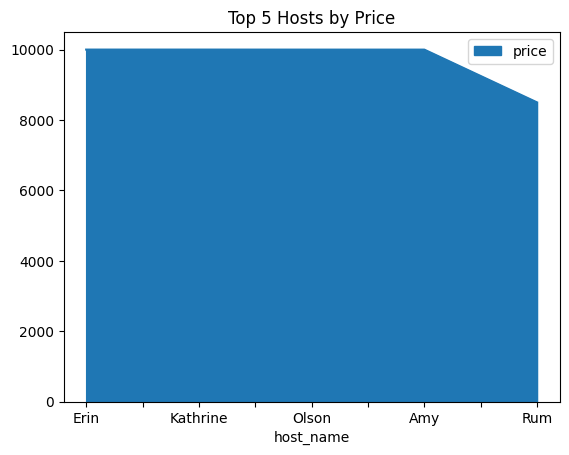

In [13]:
# Which top 5 hosts have the highest total price?
# Erin, Kathrine, Oldon, Amy, and Rum have the highest total price.
ab_nyc_2019.sort_values('price', ascending=False).head(5)
ab_nyc_2019.sort_values('price', ascending=False).head(5).plot(x='host_name', y='price',kind='area',title='Top 5 Hosts by Price')


,host_name,number_of_reviews
471,Wanda,480
9974,Gurpreet Singh,424
9976,Gurpreet Singh,408
22104,Deloris,368
5876,Veronica,351


<Axes: xlabel='host_name'>

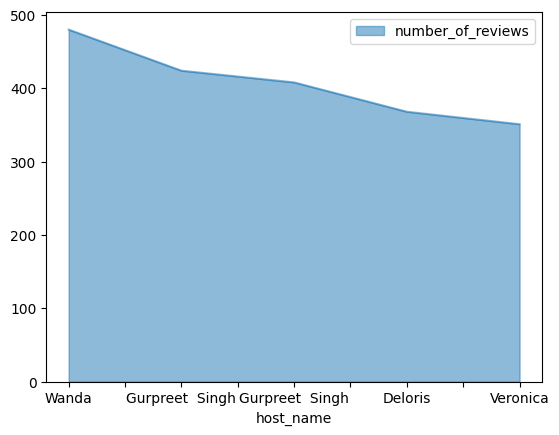

In [14]:
# Who currently has no (zero) availability with a review count of 100 or more?
# Wanda from Brooklyn as zero availability and the highest reviews at 480

zero_availability = busiest_host0[busiest_host0['number_of_reviews'] >= 100].sort_values('number_of_reviews', ascending=False)
new_stats = zero_availability[['host_name','number_of_reviews']].head(5)
display(new_stats)
new_stats.plot.area(x='host_name', y='number_of_reviews',stacked=False)



In [15]:
# What host has the highest total of prices and where are they located?
# Sonder (NYC) has the highest total of prices and they are located in the Financial District in Manhattan.
highest_prices_host_neighborhood = ab_nyc_2019.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).sum('price').round(0).sort_values('price', ascending=False).head(5).sort_values('host_id').reset_index()[[
    'host_name',
    'host_id',
    'host_name',
    'neighbourhood',
    'neighbourhood_group'
    ]
    ]
highest_prices_host_neighborhood



,host_name,host_id,host_name,neighbourhood,neighbourhood_group
0,Henry,836168,Henry,Upper West Side,Manhattan
1,Jessica,1177497,Jessica,Clinton Hill,Brooklyn
2,Kathrine,20582832,Kathrine,Astoria,Queens
3,Red Awning,205031545,Red Awning,Midtown,Manhattan
4,Sonder (NYC),219517861,Sonder (NYC),Financial District,Manhattan


In [16]:
# When did Danielle from Queens last receive a review?
# Daniel from Queens received her last review on July, 8th, 2019.

daniel = ab_nyc_2019['host_name'] == "Danielle"
queens = ab_nyc_2019['neighbourhood_group'] == 'Queens'


print(f"Please find Danielle's Review data below:\n{ab_nyc_2019[daniel & queens].sort_values('last_review',ascending=False).head(5)[['host_name', 'last_review']]}")









Please find Danielle's Review data below:
      host_name last_review
22469  Danielle  2019-07-08
21517  Danielle  2019-07-07
20403  Danielle  2019-07-06
22068  Danielle  2019-07-06
7086   Danielle  2019-07-03


## Further Questions

1. Which host has the most listings?

In [17]:
# Sonder (NYC) has the most listings at 67,689
ttl_host_listings = ab_nyc_2019.groupby(['host_id','host_name'],as_index=False).sum(
    'calculated_host_listings_count').sort_values('calculated_host_listings_count', ascending=False).head(5)[[
        'host_id','host_name','calculated_host_listings_count']]
ttl_host_listings







,host_id,host_name,calculated_host_listings_count
28206,219517861,Sonder (NYC),67689
20808,61391963,Corporate Housing,7189
23863,107434423,Blueground,6496
12011,16098958,Jeremy & Laura,5856
25210,137358866,Kazuya,5253


2. How many listings have completely open availability?

In [18]:
# 66 listings have completely open availability
ab_nyc_2019[ab_nyc_2019['availability_365'] == 365].count()

id                                841
name                              841
host_id                           841
host_name                         841
neighbourhood_group               841
neighbourhood                     841
latitude                          841
longitude                         841
room_type                         841
price                             841
minimum_nights                    841
number_of_reviews                 841
last_review                       841
reviews_per_month                 841
calculated_host_listings_count    841
availability_365                  841
dtype: int64

3. What room_types have the highest review numbers?

<Axes: title={'center': 'Highest Reviews by Room Type:'}, ylabel='# of Reviews'>

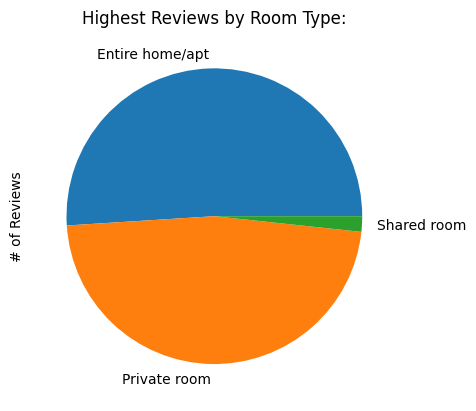

In [19]:
# The room type 'Entire home/apt' have the highest review numbers at 580,403 
room_type = ab_nyc_2019.groupby('room_type').sum('number_of_reviews').sort_values('number_of_reviews', ascending=False)[['number_of_reviews']]
room_type.plot(x='room_type',y='number_of_reviews',kind='pie',title="Highest Reviews by Room Type:",legend=False,ylabel='# of Reviews')


# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please describe them here.

-- Add your conclusion --

In [20]:
''' 
Final Review for the Air Bnb Data Set:
- Manhattan is the most popular borough. Within Manhattan, entire homes/apts are the most popular to book.
- The Max price shown is 10k for two hosts, leading the thinking that AirBnb has a max charge/per night
- Approximately 10k units do not have reviews and the data was removed from most of the study
- Wanda from Brooklyn has the highest reviews for a single unit, but Gurpree Singh has the most cumulative reviews for all his properties
- The top three hosts appear to be businesses and not privately owned. 
'''



' \nFinal Review for the Air Bnb Data Set:\n- Manhattan is the most popular borough. Within Manhattan, entire homes/apts are the most popular to book.\n- The Max price shown is 10k for two hosts, leading the thinking that AirBnb has a max charge/per night\n- Approximately 10k units do not have reviews and the data was removed from most of the study\n- Wanda from Brooklyn has the highest reviews for a single unit, but Gurpree Singh has the most cumulative reviews for all his properties\n- The top three hosts appear to be businesses and not privately owned. \n'